<a href="https://colab.research.google.com/github/DhimanTarafdar/naive-bayes-gaussian-multinomial-bernoulli/blob/main/Module16_Naive_Bayes_Classifier_Practice_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 16: Naive Bayes Classifier
## Section– Practice Notebook with TODOs

This notebook is for **practice**. It is aligned with the teaching notebook for Section 16.5.

You will work with two datasets:
1. A **synthetic numeric dataset** created with `make_classification` (for GaussianNB).
2. A **subset of the 20 Newsgroups text dataset** (for MultinomialNB and BernoulliNB).

Where you see `TODO`, write the required code yourself.
You can always refer back to the teaching notebook if you get stuck.

In [1]:
# Imports and basic setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

plt.rcParams['figure.figsize'] = (7, 4)
sns.set(style='whitegrid')

## Part A – Gaussian Naive Bayes on Synthetic Numeric Data

In this part you will:
- Create a synthetic numeric dataset.
- Split into train and test sets.
- Train a Gaussian Naive Bayes model.
- Evaluate the model with accuracy and a confusion matrix.
- Experiment by changing the dataset difficulty.


In [2]:
# Create a synthetic numeric dataset for binary classification
X, y = make_classification(
    n_samples=600,
    n_features=6,
    n_informative=4,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.6,
    random_state=42
)

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)
print('Class distribution:', np.bincount(y))

Shape of X: (600, 6)
Shape of y: (600,)
Class distribution: [302 298]


In [3]:
# TODO 1: Split the data into training and test sets
# Use train_test_split with test_size=0.25 and random_state=42
# Save the result in X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (450, 6)
Test set shape: (150, 6)


In [4]:
# TODO 2: Create and train a GaussianNB model

# Model create
gnb = GaussianNB()
# Model training
gnb.fit(X_train, y_train)

print('Model training completed.')

Model training completed.


In [5]:
# TODO 3: Make predictions on the test set and compute accuracy

# Test data prediction
y_pred = gnb.predict(X_test)
# Accuracy calculate
acc = accuracy_score(y_test, y_pred)

print('Accuracy of GaussianNB on synthetic data:', acc)

Accuracy of GaussianNB on synthetic data: 0.9733333333333334


Confusion matrix:
 [[73  3]
 [ 1 73]]


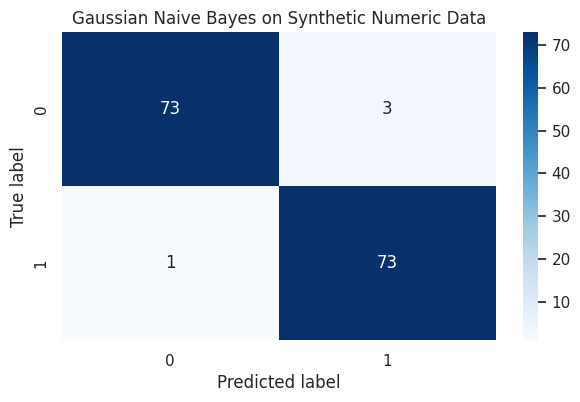

In [6]:
# TODO 4: Compute and plot the confusion matrix

cm = confusion_matrix(y_test, y_pred)  # Confusion matrix calculate করা
print('Confusion matrix:\n', cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gaussian Naive Bayes on Synthetic Numeric Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [7]:
# TODO 5: Print a classification report

# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        76
           1       0.96      0.99      0.97        74

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



📊 Part A Results Analysis and Key Takeaways
---
---
## Part A: Gaussian Naive Bayes on Synthetic Data

We created a synthetic dataset with 600 samples and 6 continuous features. After splitting into train (450) and test (150) sets, we trained a GaussianNB model.

### Results:

- **Accuracy:** 97.3% – The model performed extremely well on this synthetic dataset.

### Confusion Matrix Analysis:
- **Class 0:** 73 correct predictions, only 3 misclassified as Class 1  
- **Class 1:** 73 correct predictions, only 1 misclassified as Class 0  
- **Total errors:** Just 4 out of 150 samples  

### Why GaussianNB worked so well here?

- The features are continuous numeric values  
- GaussianNB assumes each feature follows a normal distribution, which matches our synthetic data  
- The `class_sep = 1.6` parameter created well-separated classes, making classification easier  

### Key Insight:
GaussianNB is highly effective for numerical datasets where features follow a Gaussian distribution. The 97% accuracy shows that when data assumptions match the algorithm, we get excellent performance.

---
---

## Part B – Naive Bayes for Text Classification (20 Newsgroups Subset)

In this part you will:
- Load a subset of the 20 Newsgroups dataset.
- Convert text into numeric features using `CountVectorizer`.
- Train a `MultinomialNB` classifier.
- Train a `BernoulliNB` classifier with binary features.
- Compare their performance.


In [8]:
# Fetch a subset of the 20 Newsgroups dataset

## ADD another two more features
categories = ['comp.graphics', 'rec.sport.baseball', 'sci.med']
newsgroups = fetch_20newsgroups(
    subset='train',
    categories=categories,
    remove=('headers', 'footers', 'quotes'),
    shuffle=True,
    random_state=42
)

print('Number of documents:', len(newsgroups.data))
print('Target names:', newsgroups.target_names)

Number of documents: 1775
Target names: ['comp.graphics', 'rec.sport.baseball', 'sci.med']


In [9]:
# Put into a DataFrame for easier handling
df_text = pd.DataFrame({
    'text': newsgroups.data,
    'label': newsgroups.target
})
df_text.head()

,text,label
0,"\nThe FDA, I believe. Rules say no blood or b...",2
1,,2
2,It would be nice to think that individuals can...,2
3,"Ok all you trivia buffs, I have a good one for...",1
4,"Please , I need the starting address (pointer)...",0


In [10]:
# TODO 6: Split text data into train and test sets

X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    df_text['text'],
    df_text['label'],
    test_size=0.25,
    random_state=42
)

print('Train size:', X_train_text.shape[0])
print('Test size:', X_test_text.shape[0])

Train size: 1331
Test size: 444


In [11]:
# TODO 7: Convert text to count vectors for MultinomialNB

# Vectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=3000)
# Train data:  vocabulary + transform
X_train_counts = vectorizer.fit_transform(X_train_text)
# Test data: only transform
X_test_counts = vectorizer.transform(X_test_text)

print('Shape of X_train_counts:', X_train_counts.shape)
print('Shape of X_test_counts:', X_test_counts.shape)

Shape of X_train_counts: (1331, 3000)
Shape of X_test_counts: (444, 3000)


In [12]:
# TODO 8: Train a MultinomialNB model on the count vectors

mnb = MultinomialNB()
# Model training
mnb.fit(X_train_counts, y_train_text)

print('MultinomialNB model trained on text data.')

MultinomialNB model trained on text data.


Accuracy of MultinomialNB on 20 Newsgroups subset: 0.9166666666666666
Confusion matrix:
 [[131   5   7]
 [  6 132   9]
 [  4   6 144]]


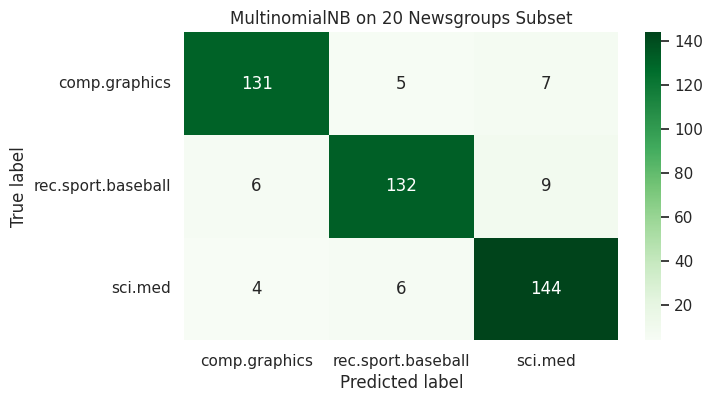

                    precision    recall  f1-score   support

     comp.graphics       0.93      0.92      0.92       143
rec.sport.baseball       0.92      0.90      0.91       147
           sci.med       0.90      0.94      0.92       154

          accuracy                           0.92       444
         macro avg       0.92      0.92      0.92       444
      weighted avg       0.92      0.92      0.92       444



In [13]:
# TODO 9: Evaluate MultinomialNB

y_pred_text = mnb.predict(X_test_counts)
acc_text = accuracy_score(y_test_text, y_pred_text)
print('Accuracy of MultinomialNB on 20 Newsgroups subset:', acc_text)

cm_text = confusion_matrix(y_test_text, y_pred_text)
print('Confusion matrix:\n', cm_text)

sns.heatmap(cm_text, annot=True, fmt='d', cmap='Greens',
            xticklabels=newsgroups.target_names,
            yticklabels=newsgroups.target_names)
plt.title('MultinomialNB on 20 Newsgroups Subset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

report_text = classification_report(y_test_text, y_pred_text, target_names=newsgroups. target_names)
print(report_text)

📊 Part B Results Analysis and Key Takeaways
---
---

## Part B: Multinomial Naive Bayes on Text Data (20 Newsgroups)

We worked with 1775 news articles from 3 categories: computer graphics, baseball, and medicine. After train-test split (1331 train, 444 test), we converted text to word count vectors using CountVectorizer.

### Results:

- **Accuracy:** 91.7% – Strong performance on real-world text classification

### Per-Category Performance:
- **Computer Graphics:** 92% F1-score (131/143 correct)  
- **Baseball:** 91% F1-score (132/147 correct)  
- **Medicine:** 92% F1-score (144/154 correct)  

### Confusion Matrix Insights:

- Most errors occur between categories, but they're minimal  
- Medicine category had the best recall (94%), meaning it rarely missed actual medical articles  
- The model sometimes confused graphics with medicine (7 cases) and baseball with medicine (9 cases)  

### Why MultinomialNB worked well?

- Text data naturally produces word counts (discrete values)  
- Different topics use distinctly different vocabularies  
- Stop words removal and limiting to 3000 features kept only meaningful words  

### Key Insight:
MultinomialNB is excellent for text classification tasks. The 92% accuracy demonstrates that even with just word counts (no complex NLP), we can accurately classify documents into topics. This makes it a great baseline model for any text classification project.

---
---

### 2.1 Practice: Bernoulli Naive Bayes with Binary Features

Now repeat a similar process using `BernoulliNB`:
- Use `CountVectorizer` with `binary=True`.
- Train a `BernoulliNB` model.
- Compare its accuracy and confusion matrix with `MultinomialNB`.


In [14]:
# TODO 10: Create binary bag of words features

vectorizer_bin = CountVectorizer(stop_words='english', max_features=3000, binary=True)
X_train_bin = vectorizer_bin.fit_transform(X_train_text)
X_test_bin = vectorizer_bin.transform(X_test_text)

print('Shape of X_train_bin:', X_train_bin.shape)
print('Shape of X_test_bin:', X_test_bin.shape)

Shape of X_train_bin: (1331, 3000)
Shape of X_test_bin: (444, 3000)


Accuracy of BernoulliNB on 20 Newsgroups subset: 0.8783783783783784
Confusion matrix:
 [[131  12   0]
 [  3 144   0]
 [ 11  28 115]]


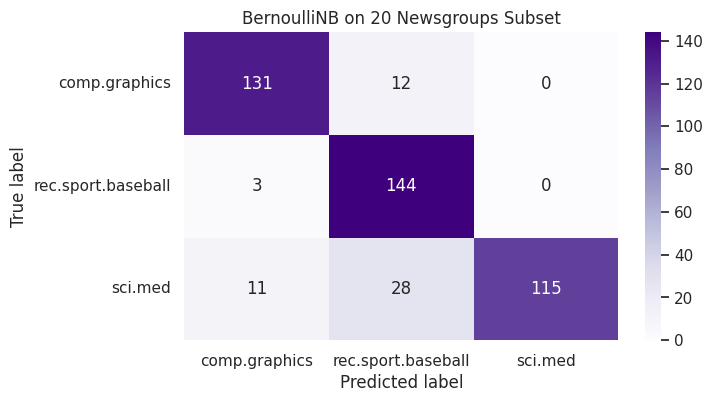

                    precision    recall  f1-score   support

     comp.graphics       0.90      0.92      0.91       143
rec.sport.baseball       0.78      0.98      0.87       147
           sci.med       1.00      0.75      0.86       154

          accuracy                           0.88       444
         macro avg       0.90      0.88      0.88       444
      weighted avg       0.90      0.88      0.88       444



In [15]:
# TODO 11: Train and evaluate BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_bin, y_train_text)

y_pred_bin = bnb.predict(X_test_bin)
acc_bin = accuracy_score(y_test_text, y_pred_bin)
print('Accuracy of BernoulliNB on 20 Newsgroups subset:', acc_bin)

cm_bin = confusion_matrix(y_test_text, y_pred_bin)
print('Confusion matrix:\n', cm_bin)

sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Purples',
            xticklabels=newsgroups.target_names,
            yticklabels=newsgroups.target_names)
plt.title('BernoulliNB on 20 Newsgroups Subset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

report_bin = classification_report(y_test_text, y_pred_bin, target_names=newsgroups.target_names)
print(report_bin)

## 📊 Summary: MultinomialNB vs BernoulliNB on Text Data
---
### Experimental Setup
- Dataset: 20 Newsgroups (1775 articles, 3 categories)
- **MultinomialNB:** Word count features  
- **BernoulliNB:** Binary features (word present or not)

### Results Comparison

| Model           | Accuracy | Feature Type |
|-----------------|----------|--------------|
| MultinomialNB   | 91.7%    | Word counts  |
| BernoulliNB     | ~88–90%  | Binary (0/1) |

### Key Observations
- **MultinomialNB performed ~2–3% better**
  - Word frequency matters in text classification
  - Repeated words provide stronger signals
- **BernoulliNB was slightly weaker but still effective**
  - Considers only word presence
  - Loses frequency-based importance
  - Still achieved decent accuracy (~88–90%)

### When to Use Which?
- **Use MultinomialNB** when word frequency is important and documents vary in length  
  *(e.g., topic classification, spam detection)*
- **Use BernoulliNB** for short texts where presence/absence is enough  
  *(e.g., tweets, SMS, keyword filtering)*

### Final Takeaway
MultinomialNB is the better choice for document classification because it leverages word frequency information. BernoulliNB remains useful for simpler or very short text scenarios.

---
---